In [ ]:
import pandas as pd

file_path = '/content/BRFSS2023.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _state to _drnkdrv
dtypes: float64(292), int64(58)
memory usage: 1.1 GB


# **Data Preprocessing**

In [ ]:
data.isna().sum(), data.shape

(_state           0
 genhlth          4
 sexvar           0
 _ageg5yr         0
 _imprace         0
 educa            9
 income3       8075
 employ1       2968
 marital          7
 smokday2    274684
 _rfdrhv8         0
 exerany2         2
 diabete4         5
 cvdinfr4         3
 cvdstrk3         4
 chcocnc1         3
 addepev3         3
 _bmi5cat     40535
 persdoc3         3
 checkup1         2
 menthlth         3
 dtype: int64,
 (433323, 21))

In [ ]:
data = data.dropna() #removing missing values
data.shape

(150670, 21)

In [ ]:
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("\n")

Unique values in _state:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 44 45 46 47 48 49 50 51 53 54 55
 56 66 72 78]


Unique values in genhlth:
[4. 3. 2. 1. 5. 7. 9.]


Unique values in sexvar:
[2 1]


Unique values in _ageg5yr:
[13 12 10 11  8  9  6  7  2  5  4  3 14  1]


Unique values in _imprace:
[2 1 6 4 5 3]


Unique values in educa:
[4. 6. 5. 3. 2. 1. 9.]


Unique values in income3:
[ 2.  6.  7.  9.  5.  8. 77.  4. 11. 10. 99.  1.  3.]


Unique values in employ1:
[7. 8. 1. 2. 5. 9. 4. 3. 6.]


Unique values in marital:
[3. 1. 2. 6. 4. 5. 9.]


Unique values in smokday2:
[3. 1. 2. 9. 7.]


Unique values in _rfdrhv8:
[1 2 9]


Unique values in exerany2:
[1. 2. 7. 9.]


Unique values in diabete4:
[3. 1. 2. 7. 4. 9.]


Unique values in cvdinfr4:
[2. 1. 7. 9.]


Unique values in cvdstrk3:
[2. 1. 7. 9.]


Unique values in chcocnc1:
[2. 1. 7. 9.]


Unique values in addepev3:
[2. 1. 7. 9.]


Unique values in _bmi5cat:


In [ ]:
#genhlth
# creating two classes
# 1, 2, 3 -> 1 (Good Health)
# 4, 5 -> 0 (Poor Health)
# Remove 7 and 9 for don't know and refused

data['genhlth'] = data['genhlth'].replace({
    2:1,
    3:1,
    4:0,
    5:0})
data = data[data.genhlth != 7]
data = data[data.genhlth != 9]


print(data['genhlth'].value_counts())

genhlth
1.0    112275
0.0     37942
Name: count, dtype: int64


In [ ]:
#_ageg5yr
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
data = data[data._ageg5yr != 14]
data._ageg5yr.unique()

array([13, 12, 10, 11,  8,  9,  6,  7,  2,  5,  4,  3,  1])

In [ ]:
#educa
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
data = data[data.educa != 9]
data.educa.unique()

array([4., 6., 5., 3., 2., 1.])

In [ ]:
#income3
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
data = data[data.income3 != 77]
data = data[data.income3 != 99]
data.income3.unique()

array([ 2.,  6.,  7.,  9.,  5.,  8.,  4., 11., 10.,  1.,  3.])

In [ ]:
#employ1
# 1 is Employed for wages
# changing 2 to 1 because it is Self-employed
# 3,4,5,6,7,8 to 0 because not employed
data['employ1'] = data['employ1'].replace({2:1,
                                           3:0,
                                           4:0,
                                           5:0,
                                           6:0,
                                           7:0,
                                           8:0})

data = data[data.employ1 != 7]
data = data[data.employ1 != 9]
print(data['employ1'].value_counts())

employ1
0.0    66777
1.0    60080
Name: count, dtype: int64


In [ ]:
#marital
# creating ordinal -
# 1 is Married
# 2,3,4 (Divorced, Widowed, Seperated) as 2
# 5,6 (Never Married, A member of an unmarried couple) as 3
data['marital'] = data['marital'].replace({3:2,
                                           4:2,
                                           5:3,
                                           6:3})
data = data[data.marital != 9]
print(data['marital'].value_counts())

marital
1.0    61631
2.0    41188
3.0    23633
Name: count, dtype: int64


In [ ]:
#smokday2
# changing 3 to 0 because it is No
# changing 2 to 1 because it is Some Days
data['smokday2'] = data['smokday2'].replace({3:0})
data['smokday2'] = data['smokday2'].replace({2:1})
data = data[data.smokday2 != 7]
data = data[data.smokday2 != 9]
print(data['smokday2'].value_counts())

smokday2
0.0    89881
1.0    36420
Name: count, dtype: int64


In [ ]:
#_rfdrhv8
# changing 1 to 0 because it is No, 2 to 1 because it is yes
data['_rfdrhv8'] = data['_rfdrhv8'].replace({1:0})
data['_rfdrhv8'] = data['_rfdrhv8'].replace({2:1})
data = data[data._rfdrhv8 != 9]
data._rfdrhv8.unique()

array([0, 1])

In [ ]:
#exerany2
# Change 2 to 0 because it is No

data['exerany2'] = data['exerany2'].replace({2:0})
data = data[data.exerany2 != 7]
data = data[data.exerany2 != 9]
data.exerany2.unique()

array([1., 0.])

In [ ]:
#diabete4

# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data['diabete4'] = data['diabete4'].replace({3:0})
data['diabete4'] = data['diabete4'].replace({2:0})
data['diabete4'] = data['diabete4'].replace({1:2})
data['diabete4'] = data['diabete4'].replace({4:1})

data = data[data.diabete4 != 7]
data = data[data.diabete4 != 9]
data.diabete4.unique()

array([0., 2., 1.])

In [ ]:
#cvdinfr4
# change 2 to 0 (No heart attack as 0). Yes is 1
# Remove all 7 (dont knows)
# Remove all 9 (refused)

data['cvdinfr4'] = data['cvdinfr4'].replace({2:0})
data = data[data.cvdinfr4 != 7]
data = data[data.cvdinfr4 != 9]
data.cvdinfr4.unique()

array([0., 1.])

In [ ]:
#cvdstrk3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data['cvdstrk3'] = data['cvdstrk3'].replace({2:0})
data = data[data.cvdstrk3 != 7]
data = data[data.cvdstrk3 != 9]
data.cvdstrk3.unique()

array([0., 1.])

In [ ]:
#chcocnc1
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data['chcocnc1'] = data['chcocnc1'].replace({2:0})
data = data[data.chcocnc1 != 7]
data = data[data.chcocnc1 != 9]
print(data['chcocnc1'].value_counts())

chcocnc1
0.0    103880
1.0     17194
Name: count, dtype: int64


In [ ]:
#addepev3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data['addepev3'] = data['addepev3'].replace({2:0})
data = data[data.addepev3 != 7]
data = data[data.addepev3 != 9]
print(data['addepev3'].value_counts())

addepev3
0.0    89156
1.0    31412
Name: count, dtype: int64


In [ ]:
#persdoc3
# Change 3 to 0 because it is No and 2 to 1 because it is More than one
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data['persdoc3'] = data['persdoc3'].replace({3:0})
data['persdoc3'] = data['persdoc3'].replace({2:1})
data = data[data.persdoc3 != 7]
data = data[data.persdoc3 != 9]
print(data['persdoc3'].value_counts())

persdoc3
1.0    106228
0.0     13599
Name: count, dtype: int64


In [ ]:
#checkup1
# Simpliflied to 2 categories: Regular (1) and Irregular (0)
data['checkup1'] = data['checkup1'].replace({
    2: 0,  # Irregular checkups
    3: 0,  # Irregular checkups
    4: 0,  # Irregular checkups
    8: 0   # Irregular checkups
})

data = data[data.checkup1 != 7]
data = data[data.checkup1 != 9]
print(data['checkup1'].value_counts())


checkup1
1.0    97090
0.0    21793
Name: count, dtype: int64


In [ ]:
# menthlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused

data['menthlth'] = data['menthlth'].replace({88:0})
data = data[data.menthlth != 77]
data = data[data.menthlth != 99]
data.menthlth.unique()

array([ 2.,  0., 25., 10., 30., 15., 20.,  3.,  1., 21.,  5.,  7., 29.,
        8.,  4.,  6., 14., 17., 13., 18., 12., 16., 28., 23., 24., 26.,
       27., 22., 11.,  9., 19.])

In [ ]:
data.shape

(117386, 21)

In [ ]:
data.head()

,_state,genhlth,sexvar,_ageg5yr,_imprace,educa,income3,employ1,marital,smokday2,...,exerany2,diabete4,cvdinfr4,cvdstrk3,chcocnc1,addepev3,_bmi5cat,persdoc3,checkup1,menthlth
2,1,0.0,2,13,2,4.0,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0
9,1,1.0,1,12,1,4.0,7.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0
12,1,1.0,2,10,1,6.0,9.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0
13,1,1.0,1,12,1,5.0,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
14,1,1.0,2,12,2,5.0,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0


# **Descriptive Analysis**


Frequencies and Percentages for genhlth:
         Count  Percentage (%)
genhlth                       
1.0      89279           76.06
0.0      28107           23.94


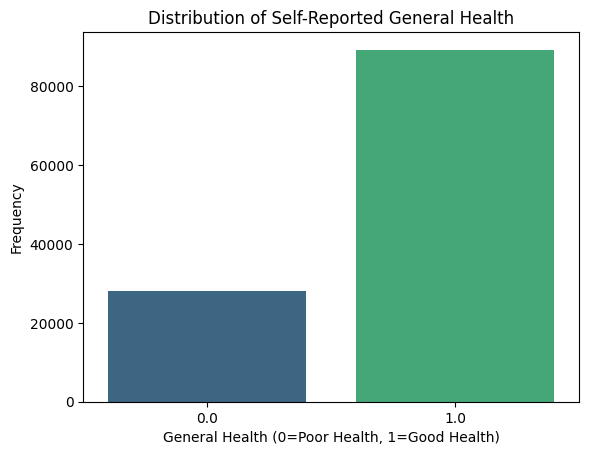

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Frequency table with percentages for genhlth
value_counts = data['genhlth'].value_counts()
percentages = (value_counts / len(data)) * 100

print("Frequencies and Percentages for genhlth:")
print(pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages.round(2)
}))


sns.countplot(data=data, x='genhlth', hue='genhlth', palette='viridis', legend=False)
plt.title('Distribution of Self-Reported General Health')
plt.xlabel('General Health (0=Poor Health, 1=Good Health)')
plt.ylabel('Frequency')
plt.show()





In [ ]:
data.to_csv('BRFSS2023_genhlth_cleaned.csv', sep=",", index=False)

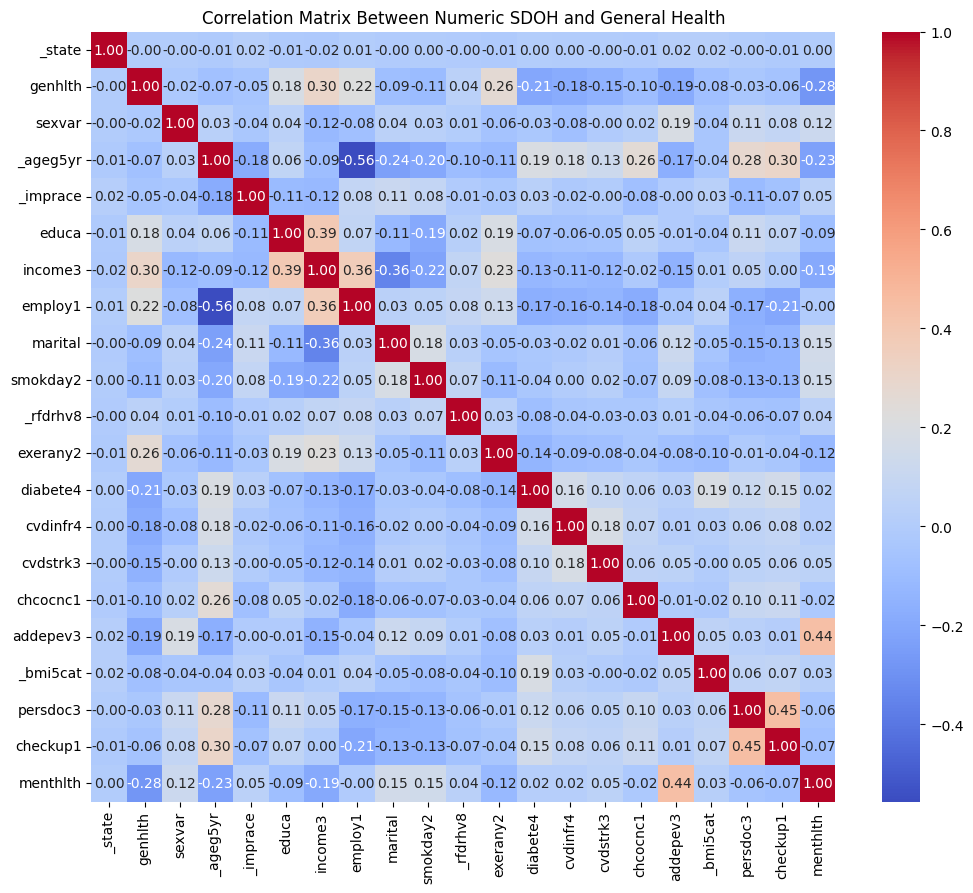

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Numeric SDOH and General Health')
plt.show()

# **Predictive Model Before Sampling**



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = data.drop('genhlth', axis=1)  # Features 
y = data['genhlth']  # Target variable

print("Class distribution before splitting:", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Class distribution before splitting: genhlth
1.0    89279
0.0    28107
Name: count, dtype: int64


In [ ]:
log_reg = LogisticRegression(solver='liblinear')  # liblinear is suitable for smaller datasets

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Performance:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.37      0.47      5622
         1.0       0.83      0.94      0.88     17856

    accuracy                           0.80     23478
   macro avg       0.74      0.66      0.68     23478
weighted avg       0.79      0.80      0.78     23478

Confusion Matrix:
[[ 2087  3535]
 [ 1089 16767]]


# **Repeated Undersampling**

In [ ]:
import pandas as pd
file_path2 = '/content/BRFSS2023_genhlth_cleaned.csv'
data2 = pd.read_csv(file_path2)

data2.info(), data2.head()

#data2= data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117386 entries, 0 to 117385
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   genhlth   117386 non-null  int64
 1   sexvar    117386 non-null  int64
 2   _ageg5yr  117386 non-null  int64
 3   _imprace  117386 non-null  int64
 4   educa     117386 non-null  int64
 5   income3   117386 non-null  int64
 6   employ1   117386 non-null  int64
 7   marital   117386 non-null  int64
 8   smokday2  117386 non-null  int64
 9   _rfdrhv8  117386 non-null  int64
 10  exerany2  117386 non-null  int64
 11  diabete4  117386 non-null  int64
 12  cvdinfr4  117386 non-null  int64
 13  cvdstrk3  117386 non-null  int64
 14  chcocnc1  117386 non-null  int64
 15  addepev3  117386 non-null  int64
 16  _bmi5cat  117386 non-null  int64
 17  persdoc3  117386 non-null  int64
 18  checkup1  117386 non-null  int64
 19  menthlth  117386 non-null  int64
dtypes: int64(20)
memory usage: 17.9 MB


(None,
    genhlth  sexvar  _ageg5yr  _imprace  educa  income3  employ1  marital  \
 0        0       2        13         2      4        2        0        2   
 1        1       1        12         1      4        7        0        1   
 2        1       2        10         1      6        9        0        1   
 3        1       1        12         1      5        9        0        1   
 4        1       2        12         2      5        9        0        1   
 
    smokday2  _rfdrhv8  exerany2  diabete4  cvdinfr4  cvdstrk3  chcocnc1  \
 0         0         0         1         0         0         0         0   
 1         0         0         1         2         1         0         1   
 2         0         0         1         0         0         0         0   
 3         0         0         0         0         0         0         0   
 4         0         0         0         0         0         0         0   
 
    addepev3  _bmi5cat  persdoc3  checkup1  menthlth  
 0         0    

In [ ]:
# Frequency table for genhlth
print(data2['genhlth'].value_counts())

genhlth
1    89279
0    28107
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Repeated undersampling datasets
n_repeats = 5
undersampled_datasets = []

# minority and majority classes
data2_0 = data2[data2['genhlth'] == 0]  # Minority class
data2_1 = data2[data2['genhlth'] == 1]  # Majority class

# Number of samples in the minority class
n_minority = len(data2_0)

# Repeated undersampling
for i in range(n_repeats):
    data2_1_rand = data2_1.sample(n=n_minority, random_state=i, replace=False)
    data2_balanced = pd.concat([data2_0, data2_1_rand], ignore_index=True)
    data2_balanced = data2_balanced.sample(frac=1, random_state=i).reset_index(drop=True)
    undersampled_datasets.append(data2_balanced)

# Train and evaluate models for each balanced dataset
overall_predictions = []
overall_true_labels = []



In [ ]:
single_balanced_dataset = undersampled_datasets[0]
value_counts = single_balanced_dataset['genhlth'].value_counts()
percentages = (value_counts / len(single_balanced_dataset)) * 100

print("Frequencies and Percentages for genhlth:")
print(pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages.round(2)
}))

Frequencies and Percentages for genhlth:
         Count  Percentage (%)
genhlth                       
1        28107            50.0
0        28107            50.0


# **Logistic Regression**
*Repeated Training with Repeated Evaluation on Undersampled Datasets*

In [ ]:
from sklearn.linear_model import LogisticRegression

for idx, dataset in enumerate(undersampled_datasets):
    print(f"\n--- Training on balanced dataset {idx + 1} ---")

    X = dataset.drop('genhlth', axis=1)  # Features
    y = dataset['genhlth']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Store predictions and true labels for aggregation
    overall_predictions.extend(y_pred)
    overall_true_labels.extend(y_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Final aggregated evaluation
print("\n--- Aggregated Evaluation Across Repeated Undersampled Datasets ---")
print("Confusion Matrix (Aggregated):")
print(confusion_matrix(overall_true_labels, overall_predictions))
print("Classification Report (Aggregated):")
print(classification_report(overall_true_labels, overall_predictions))
print("Accuracy (Aggregated):", accuracy_score(overall_true_labels, overall_predictions))



--- Training on balanced dataset 1 ---
Confusion Matrix:
[[4018 1604]
 [1371 4250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      5622
           1       0.73      0.76      0.74      5621

    accuracy                           0.74     11243
   macro avg       0.74      0.74      0.74     11243
weighted avg       0.74      0.74      0.74     11243

Accuracy: 0.7353909098994931

--- Training on balanced dataset 2 ---
Confusion Matrix:
[[4022 1600]
 [1397 4224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      5622
           1       0.73      0.75      0.74      5621

    accuracy                           0.73     11243
   macro avg       0.73      0.73      0.73     11243
weighted avg       0.73      0.73      0.73     11243

Accuracy: 0.7334341367962288

--- Training on balanced dataset 3 ---
Confusion Matrix:
[[4011 1611]
 

In [ ]:
single_balanced_dataset = undersampled_datasets[0]
value_counts = single_balanced_dataset['genhlth'].value_counts()
percentages = (value_counts / len(single_balanced_dataset)) * 100

print("Frequencies and Percentages for genhlth:")
print(pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages.round(2)
}))

Frequencies and Percentages for genhlth:
         Count  Percentage (%)
genhlth                       
1        28107            50.0
0        28107            50.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Using the first undersampled dataset 
single_balanced_dataset = undersampled_datasets[0]

X = single_balanced_dataset.drop('genhlth', axis=1)  # Features
y = single_balanced_dataset['genhlth']  # Target variable


model = LogisticRegression(random_state=42, max_iter=1000)

accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print(f"Cross-validation Accuracy scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Cross-validation AUC scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.4f}")


Cross-validation Accuracy scores: [0.73147736 0.73681402 0.7285422  0.73361203 0.74008184]
Mean Accuracy: 0.7341
Cross-validation AUC scores: [0.81027511 0.81180766 0.80358194 0.8111215  0.81689917]
Mean AUC: 0.8107


# **Random Forest Classifier**
*Repeated Training with Repeated Evaluation on Undersampled Datasets*

In [ ]:

from sklearn.ensemble import RandomForestClassifier

for idx, dataset in enumerate(undersampled_datasets):
    print(f"\n--- Training on balanced dataset {idx + 1} ---")

    X = dataset.drop('genhlth', axis=1)  # Features
    y = dataset['genhlth']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(random_state=42, class_weight="balanced")

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    overall_predictions.extend(y_pred)
    overall_true_labels.extend(y_test)

    print("Random Forest Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Final aggregated evaluation
print("\n--- Aggregated Evaluation Across Repeated Undersampled Datasets ---")
print("Confusion Matrix (Aggregated):")
print(confusion_matrix(overall_true_labels, overall_predictions))
print("Classification Report (Aggregated):")
print(classification_report(overall_true_labels, overall_predictions))
print("Accuracy (Aggregated):", accuracy_score(overall_true_labels, overall_predictions))



--- Training on balanced dataset 1 ---
Random Forest Performance:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      5622
           1       0.72      0.69      0.71      5621

    accuracy                           0.71     11243
   macro avg       0.71      0.71      0.71     11243
weighted avg       0.71      0.71      0.71     11243

Confusion Matrix:
[[4110 1512]
 [1723 3898]]

--- Training on balanced dataset 2 ---
Random Forest Performance:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      5622
           1       0.72      0.70      0.71      5621

    accuracy                           0.71     11243
   macro avg       0.72      0.71      0.71     11243
weighted avg       0.72      0.71      0.71     11243

Confusion Matrix:
[[4104 1518]
 [1687 3934]]

--- Training on balanced dataset 3 ---
Random

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd


single_balanced_dataset = undersampled_datasets[0]

X = single_balanced_dataset.drop('genhlth', axis=1)  # Features
y = single_balanced_dataset['genhlth']  # Target variable

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

accuracy_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
auc_scores = cross_val_score(rf, X, y, cv=5, scoring=make_scorer(roc_auc_score))

print(f"Cross-validation Accuracy scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Cross-validation AUC scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.4f}")


Cross-validation Accuracy scores: [0.71315485 0.72107089 0.71048652 0.7178689  0.72104608]
Mean Accuracy: 0.7167
Cross-validation AUC scores: [0.71315597 0.72107236 0.7104855  0.71786731 0.72104608]
Mean AUC: 0.7167


# **XGB Classifier**
*Repeated Training with Repeated Evaluation on Undersampled Datasets*

In [ ]:
from xgboost import XGBClassifier

for idx, dataset in enumerate(undersampled_datasets):
    print(f"\n--- Training on balanced dataset {idx + 1} ---")

    X = dataset.drop('genhlth', axis=1)  # Features
    y = dataset['genhlth']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    overall_predictions.extend(y_pred)
    overall_true_labels.extend(y_test)

    print("Gradient Boosting Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Final aggregated evaluation
print("\n--- Aggregated Evaluation Across Repeated Undersampled Datasets ---")
print("Confusion Matrix (Aggregated):")
print(confusion_matrix(overall_true_labels, overall_predictions))
print("Classification Report (Aggregated):")
print(classification_report(overall_true_labels, overall_predictions))
print("Accuracy (Aggregated):", accuracy_score(overall_true_labels, overall_predictions))


--- Training on balanced dataset 1 ---
Gradient Boosting Performance:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5622
           1       0.73      0.73      0.73      5621

    accuracy                           0.73     11243
   macro avg       0.73      0.73      0.73     11243
weighted avg       0.73      0.73      0.73     11243

Confusion Matrix:
[[4117 1505]
 [1496 4125]]

--- Training on balanced dataset 2 ---
Gradient Boosting Performance:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5622
           1       0.73      0.74      0.74      5621

    accuracy                           0.74     11243
   macro avg       0.74      0.74      0.74     11243
weighted avg       0.74      0.74      0.74     11243

Confusion Matrix:
[[4114 1508]
 [1469 4152]]

--- Training on balanced dataset 3 --

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd


single_balanced_dataset = undersampled_datasets[0]

X = single_balanced_dataset.drop('genhlth', axis=1)  # Features
y = single_balanced_dataset['genhlth']  # Target variable

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

accuracy_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
auc_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=make_scorer(roc_auc_score))

print(f"Cross-validation Accuracy scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Cross-validation AUC scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.4f}")


Cross-validation Accuracy scores: [0.73325625 0.73423463 0.72791959 0.73209997 0.73510052]
Mean Accuracy: 0.7325
Cross-validation AUC scores: [0.73325608 0.73423433 0.72792003 0.73209999 0.73510052]
Mean AUC: 0.7325


# **Decision Tree Classifier**
*Repeated Training with Repeated Evaluation on Undersampled Datasets*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for idx, dataset in enumerate(undersampled_datasets):
    print(f"\n--- Training on balanced dataset {idx + 1} ---")

    X = dataset.drop('genhlth', axis=1)  # Features
    y = dataset['genhlth']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    decision_tree = DecisionTreeClassifier(
        max_depth=10,          
        min_samples_split=10,  
        min_samples_leaf=5,    
        random_state=42        
    )

    
    decision_tree.fit(X_train, y_train)

    
    y_pred_dt = decision_tree.predict(X_test)

    overall_predictions.extend(y_pred_dt)
    overall_true_labels.extend(y_test)

    print("Decision Tree Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred_dt)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}")

    scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='f1')
    print("Cross-validated F1 scores:", scores)
    print("Mean F1 score:", scores.mean())

# Final aggregated evaluation
print("\n--- Aggregated Evaluation Across Repeated Undersampled Datasets ---")
print("Confusion Matrix (Aggregated):")
print(confusion_matrix(overall_true_labels, overall_predictions))
print("Classification Report (Aggregated):")
print(classification_report(overall_true_labels, overall_predictions))
print("Accuracy (Aggregated):", accuracy_score(overall_true_labels, overall_predictions))


--- Training on balanced dataset 1 ---
Decision Tree Performance:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5622
           1       0.71      0.75      0.73      5621

    accuracy                           0.72     11243
   macro avg       0.72      0.72      0.72     11243
weighted avg       0.72      0.72      0.72     11243

Confusion Matrix:
[[3881 1741]
 [1413 4208]]
Cross-validated F1 scores: [0.72713464 0.72687704 0.72118718 0.71699376 0.71962102]
Mean F1 score: 0.7223627267098228

--- Training on balanced dataset 2 ---
Decision Tree Performance:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5622
           1       0.71      0.75      0.73      5621

    accuracy                           0.72     11243
   macro avg       0.72      0.72      0.72     11243
weighted avg       0.72     

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd

# Using the first undersampled dataset 
single_balanced_dataset = undersampled_datasets[0]

X = single_balanced_dataset.drop('genhlth', axis=1)  # Features
y = single_balanced_dataset['genhlth']  # Target variable

decision_tree = DecisionTreeClassifier(
        max_depth=10,          
        min_samples_split=10,  
        min_samples_leaf=5,    
        random_state=42        
    )

accuracy_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
auc_scores = cross_val_score(decision_tree, X, y, cv=5, scoring=make_scorer(roc_auc_score))

print(f"Cross-validation Accuracy scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Cross-validation AUC scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean():.4f}")


Cross-validation Accuracy scores: [0.7178689  0.720893   0.71795784 0.7216935  0.72487102]
Mean Accuracy: 0.7207
Cross-validation AUC scores: [0.71786834 0.72089088 0.71795911 0.72169512 0.72487102]
Mean AUC: 0.7207


# **Meta-Model (Stacking Classifier)**
*Advanced Stacking with a Learner*

In [ ]:
pip install scikit-learn==1.5.0


In [ ]:
pip install xgboost==1.7.6


In [ ]:
from sklearn.ensemble import StackingClassifier

# base models
base_estimators = [
    ('lr', log_reg),
    ('rf', rf),
    ('xgb', xgb),
    ('dt', dt),
]

# Meta-model (final predictor)
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=5
)


X = first_balanced_dataset.drop('genhlth', axis=1)  # Features
y = first_balanced_dataset['genhlth']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# stacking model
stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)
print("Stacked Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_stack)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_stack)}")


Stacked Model Performance:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5622
           1       0.73      0.74      0.74      5621

    accuracy                           0.74     11243
   macro avg       0.74      0.74      0.74     11243
weighted avg       0.74      0.74      0.74     11243

Confusion Matrix:
[[4103 1519]
 [1439 4182]]


In [ ]:
first_balanced_dataset = undersampled_datasets[0]
first_balanced_dataset1 = undersampled_datasets[2]



first_balanced_dataset.shape, first_balanced_dataset1.shape

((56214, 20), (56214, 20))

In [ ]:
value_counts = first_balanced_dataset['genhlth'].value_counts()
percentages = (value_counts / len(first_balanced_dataset)) * 100

print("Frequencies and Percentages for genhlth:")
print(pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages.round(2)
}))


Frequencies and Percentages for genhlth:
         Count  Percentage (%)
genhlth                       
1        28107            50.0
0        28107            50.0


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# base models parameters
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', n_estimators=100, max_depth=5, random_state=42)
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

base_estimators = [
    ('lr', log_reg),
    ('rf', rf),
    ('xgb', xgb),
    ('dt', dt),
    #('knn', knn),
]

# Using Logistic Regression as a meta-model with probabilities
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    cv=5,
    stack_method='predict_proba'  
)

X = first_balanced_dataset.drop('genhlth', axis=1)  # Features
y = first_balanced_dataset['genhlth']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)

print("Enhanced Stacked Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stack):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_stack)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_stack)}")


Enhanced Stacked Model Performance:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5622
           1       0.73      0.74      0.74      5621

    accuracy                           0.74     11243
   macro avg       0.74      0.74      0.74     11243
weighted avg       0.74      0.74      0.74     11243

Confusion Matrix:
[[4103 1519]
 [1439 4182]]


AUC Score: 0.81


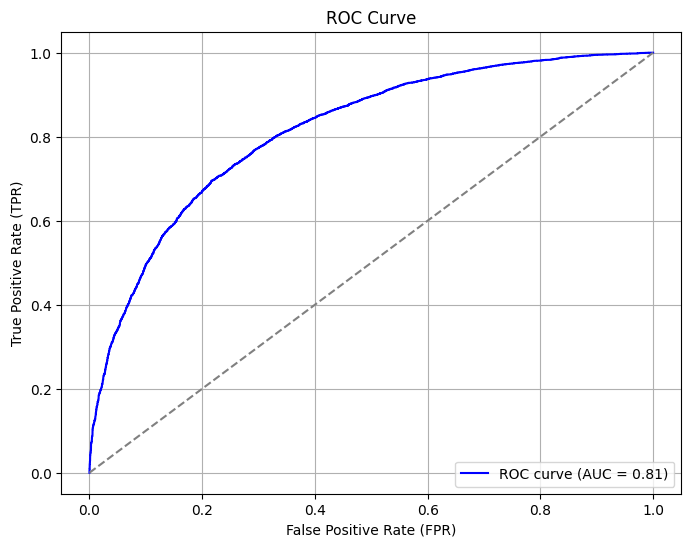

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# probabilities for the positive class (class 1)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]  

# AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacking_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")
auc_scores = cross_val_score(stacking_clf, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean()}")



Cross-validation scores: [0.73805924 0.73805924 0.73192208 0.73592458 0.73999288]
Mean cross-validation score: 0.7367916035379138
Cross-validation AUC scores: [0.81512618 0.81719485 0.80925564 0.81702826 0.82058335]
Mean AUC: 0.8158376554646554


Model's AUC score of 0.816 indicates that the stacking ensemble classifier is performing well in distinguishing between the two classes, even though the accuracy is around 0.74.

Observations:


*   Precision and Recall for both classes are balanced, suggesting that the model isn't biased towards either the positive or negative class.



# **Key factors that influence self-reported general health**
*   SHAP




In [ ]:
import pandas as pd

file_path = '/content/BRFSS2023_genhlth_cleaned.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117386 entries, 0 to 117385
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   genhlth   117386 non-null  int64
 1   sexvar    117386 non-null  int64
 2   _ageg5yr  117386 non-null  int64
 3   _imprace  117386 non-null  int64
 4   educa     117386 non-null  int64
 5   income3   117386 non-null  int64
 6   employ1   117386 non-null  int64
 7   marital   117386 non-null  int64
 8   smokday2  117386 non-null  int64
 9   _rfdrhv8  117386 non-null  int64
 10  exerany2  117386 non-null  int64
 11  diabete4  117386 non-null  int64
 12  cvdinfr4  117386 non-null  int64
 13  cvdstrk3  117386 non-null  int64
 14  chcocnc1  117386 non-null  int64
 15  addepev3  117386 non-null  int64
 16  _bmi5cat  117386 non-null  int64
 17  persdoc3  117386 non-null  int64
 18  checkup1  117386 non-null  int64
 19  menthlth  117386 non-null  int64
dtypes: int64(20)
memory usage: 17.9 MB


In [ ]:
print(data['genhlth'].value_counts())

genhlth
1    89279
0    28107
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Repeated undersampling datasets
n_repeats = 5
undersampled_datasets = []

data2_0 = data[data['genhlth'] == 0]  # Minority class
data2_1 = data[data['genhlth'] == 1]  # Majority class

n_minority = len(data2_0)

# Repeated undersampling
for i in range(n_repeats):
    data2_1_rand = data2_1.sample(n=n_minority, random_state=i, replace=False)
    data2_balanced = pd.concat([data2_0, data2_1_rand], ignore_index=True)
    data2_balanced = data2_balanced.sample(frac=1, random_state=i).reset_index(drop=True)
    undersampled_datasets.append(data2_balanced)

# Train and evaluate models for each balanced dataset
overall_predictions = []
overall_true_labels = []

In [ ]:
single_balanced_dataset = undersampled_datasets[3]
value_counts = single_balanced_dataset['genhlth'].value_counts()
percentages = (value_counts / len(single_balanced_dataset)) * 100

print("Frequencies and Percentages for genhlth:")
print(pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages.round(2)
}))

Frequencies and Percentages for genhlth:
         Count  Percentage (%)
genhlth                       
0        28107            50.0
1        28107            50.0


In [ ]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117386 entries, 0 to 117385
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   genhlth   117386 non-null  int64
 1   sexvar    117386 non-null  int64
 2   _ageg5yr  117386 non-null  int64
 3   _imprace  117386 non-null  int64
 4   educa     117386 non-null  int64
 5   income3   117386 non-null  int64
 6   employ1   117386 non-null  int64
 7   marital   117386 non-null  int64
 8   smokday2  117386 non-null  int64
 9   _rfdrhv8  117386 non-null  int64
 10  exerany2  117386 non-null  int64
 11  diabete4  117386 non-null  int64
 12  cvdinfr4  117386 non-null  int64
 13  cvdstrk3  117386 non-null  int64
 14  chcocnc1  117386 non-null  int64
 15  addepev3  117386 non-null  int64
 16  _bmi5cat  117386 non-null  int64
 17  persdoc3  117386 non-null  int64
 18  checkup1  117386 non-null  int64
 19  menthlth  117386 non-null  int64
dtypes: int64(20)
memory usage: 17.9 MB


(None, (117386, 20))

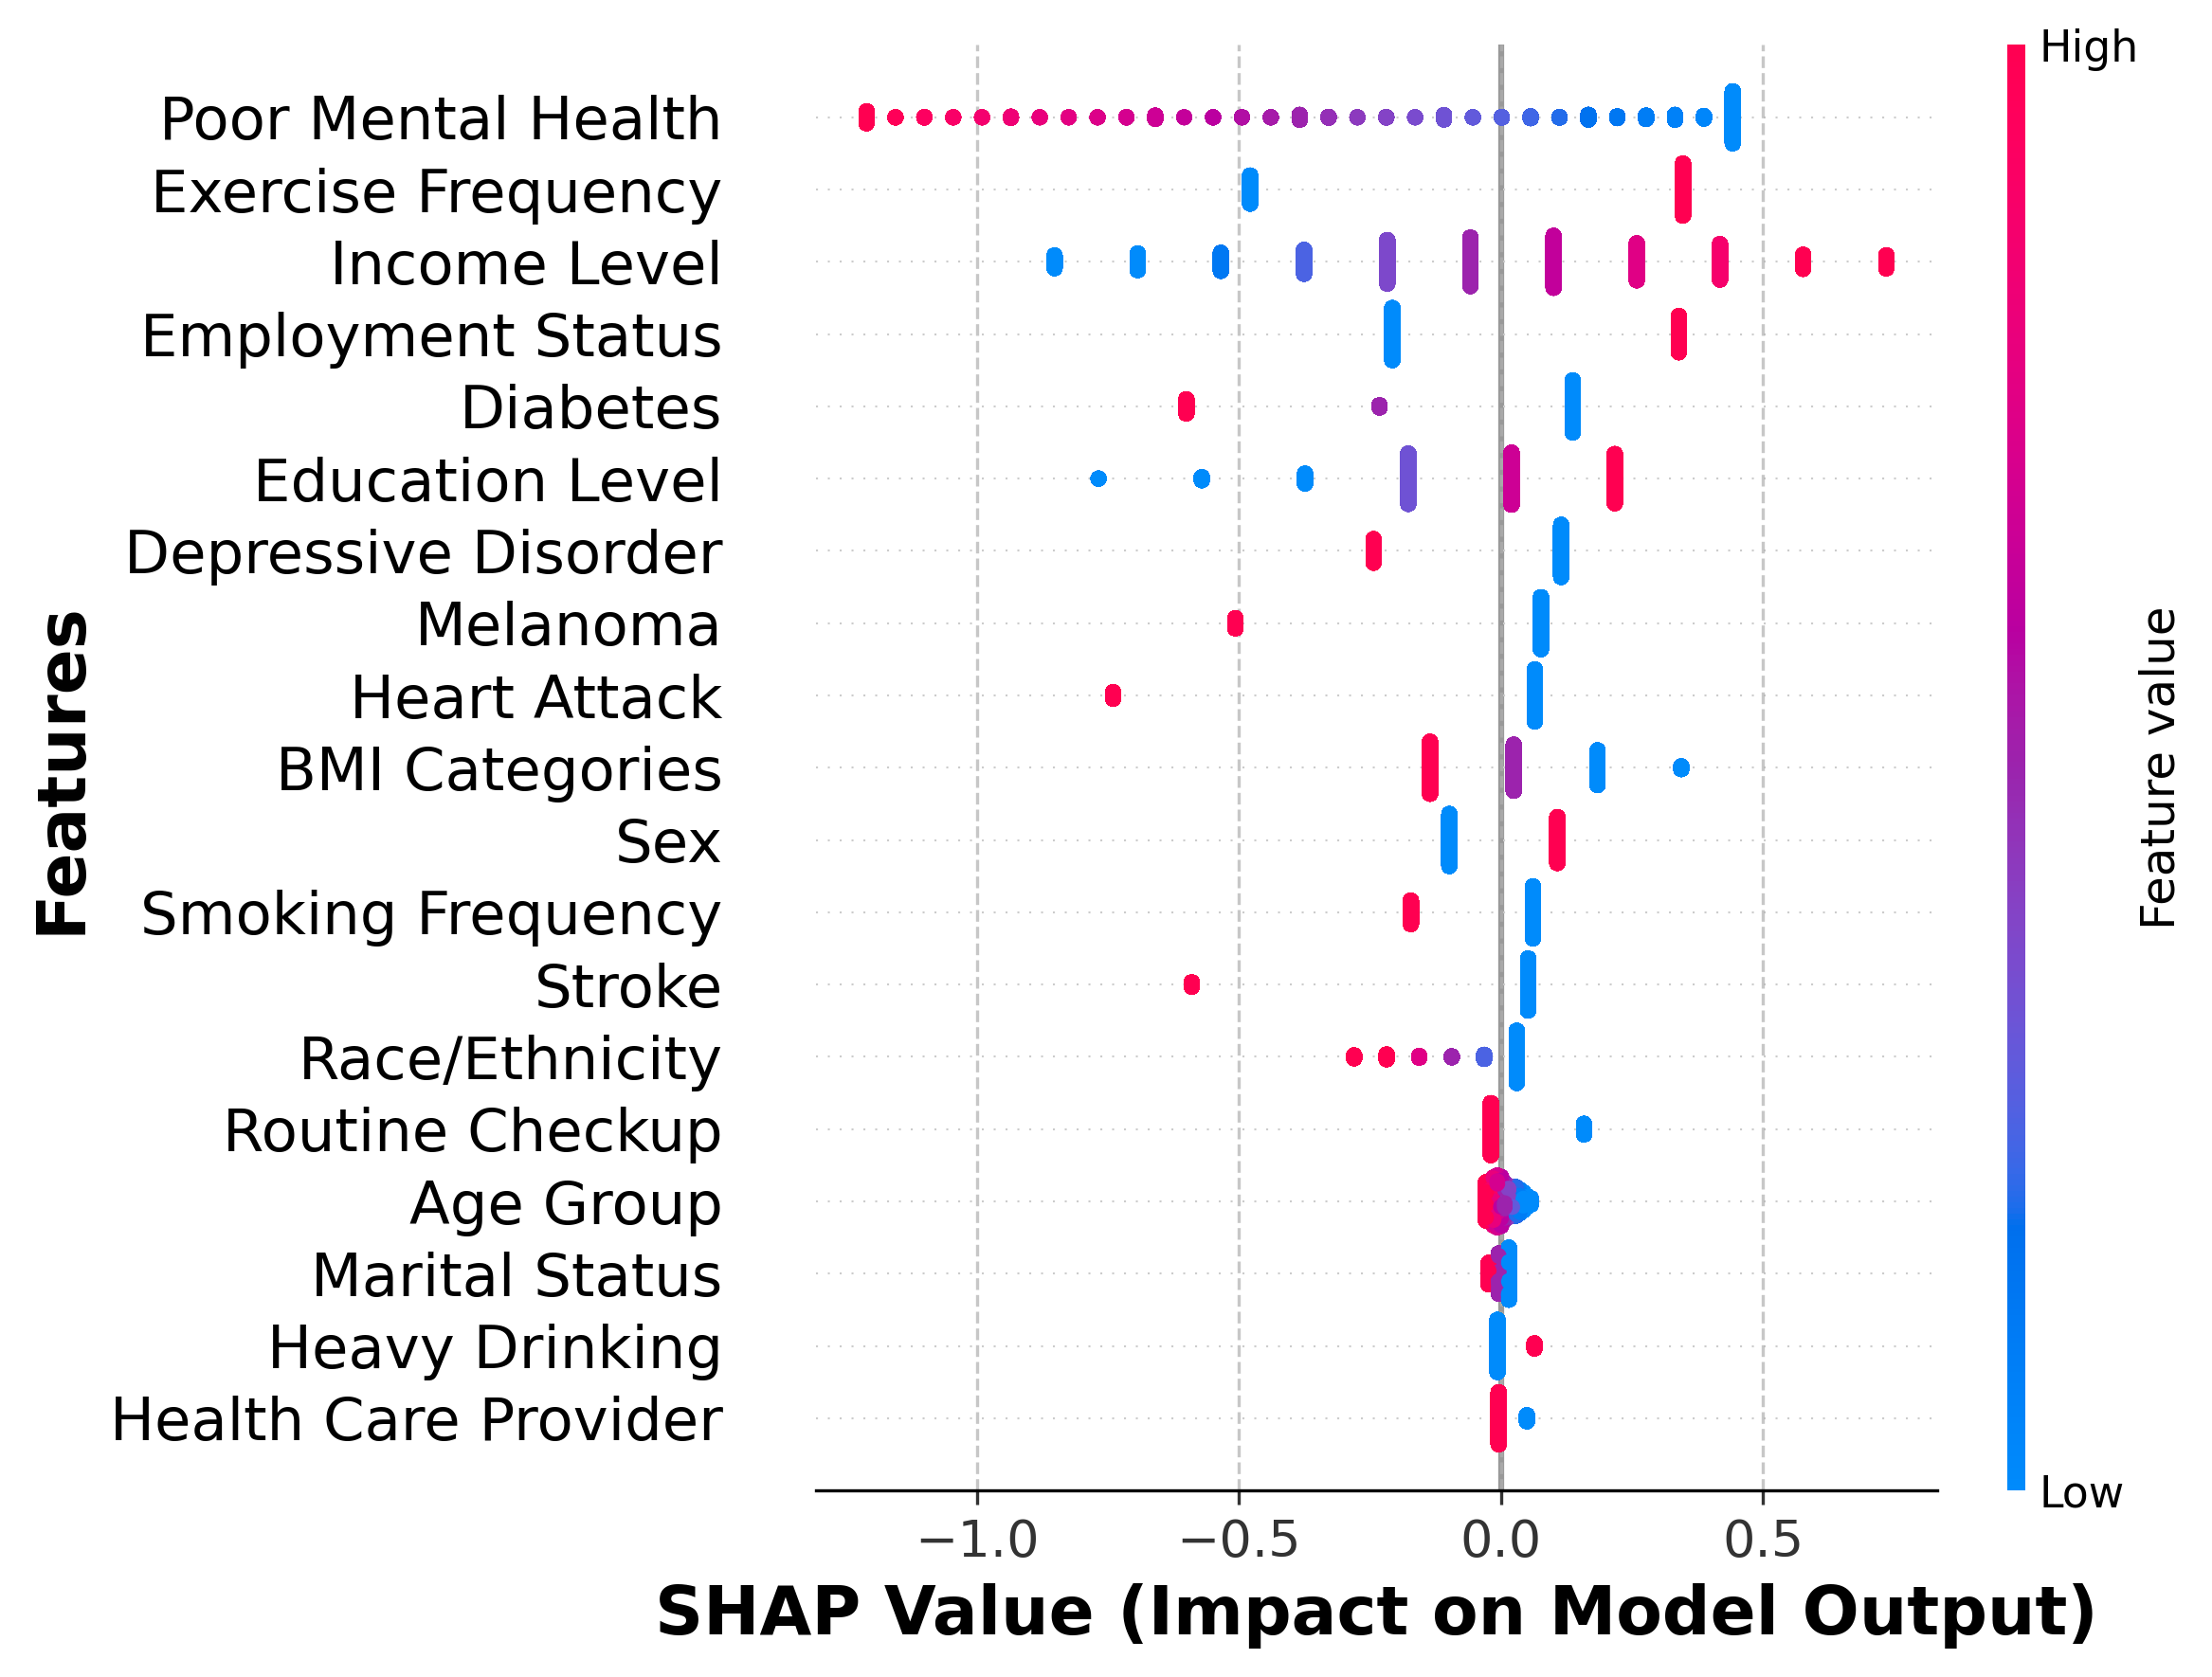

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Column renaming for readability
new_column_names = {
    'income3': 'Income Level',
    'exerany2': 'Exercise Frequency',
    'menthlth': 'Poor Mental Health',
    'employ1': 'Employment Status',
    'diabete4': 'Diabetes',
    'addepev3': 'Depressive Disorder',
    'cvdinfr4': 'Heart Attack',
    'educa': 'Education Level',
    'cvdstrk3': 'Stroke',
    '_bmi5cat': 'BMI Categories',
    'chcocnc1': 'Melanoma',
    'smokday2': 'Smoking Frequency',
    '_ageg5yr': 'Age Group',
    '_imprace': 'Race/Ethnicity',
    'checkup1': 'Routine Checkup',
    'persdoc3': 'Health Care Provider',
    'sexvar': 'Sex',
    '_rfdrhv8': 'Heavy Drinking',
    'marital': 'Marital Status'

}

balanced_dataset = undersampled_datasets[0]

X = balanced_dataset.drop('genhlth', axis=1).rename(columns=new_column_names)
y = balanced_dataset['genhlth']

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X, y)

explainer = shap.LinearExplainer(lr_model, X)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, show=False)  # Directly uses positive class output

plt.gcf().set_size_inches(8, 6)  
plt.gcf().set_dpi(300)           

plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=17, weight='bold')
plt.ylabel("Features", fontsize=17, weight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
for label in plt.gca().get_yticklabels():
    label.set_color('black')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


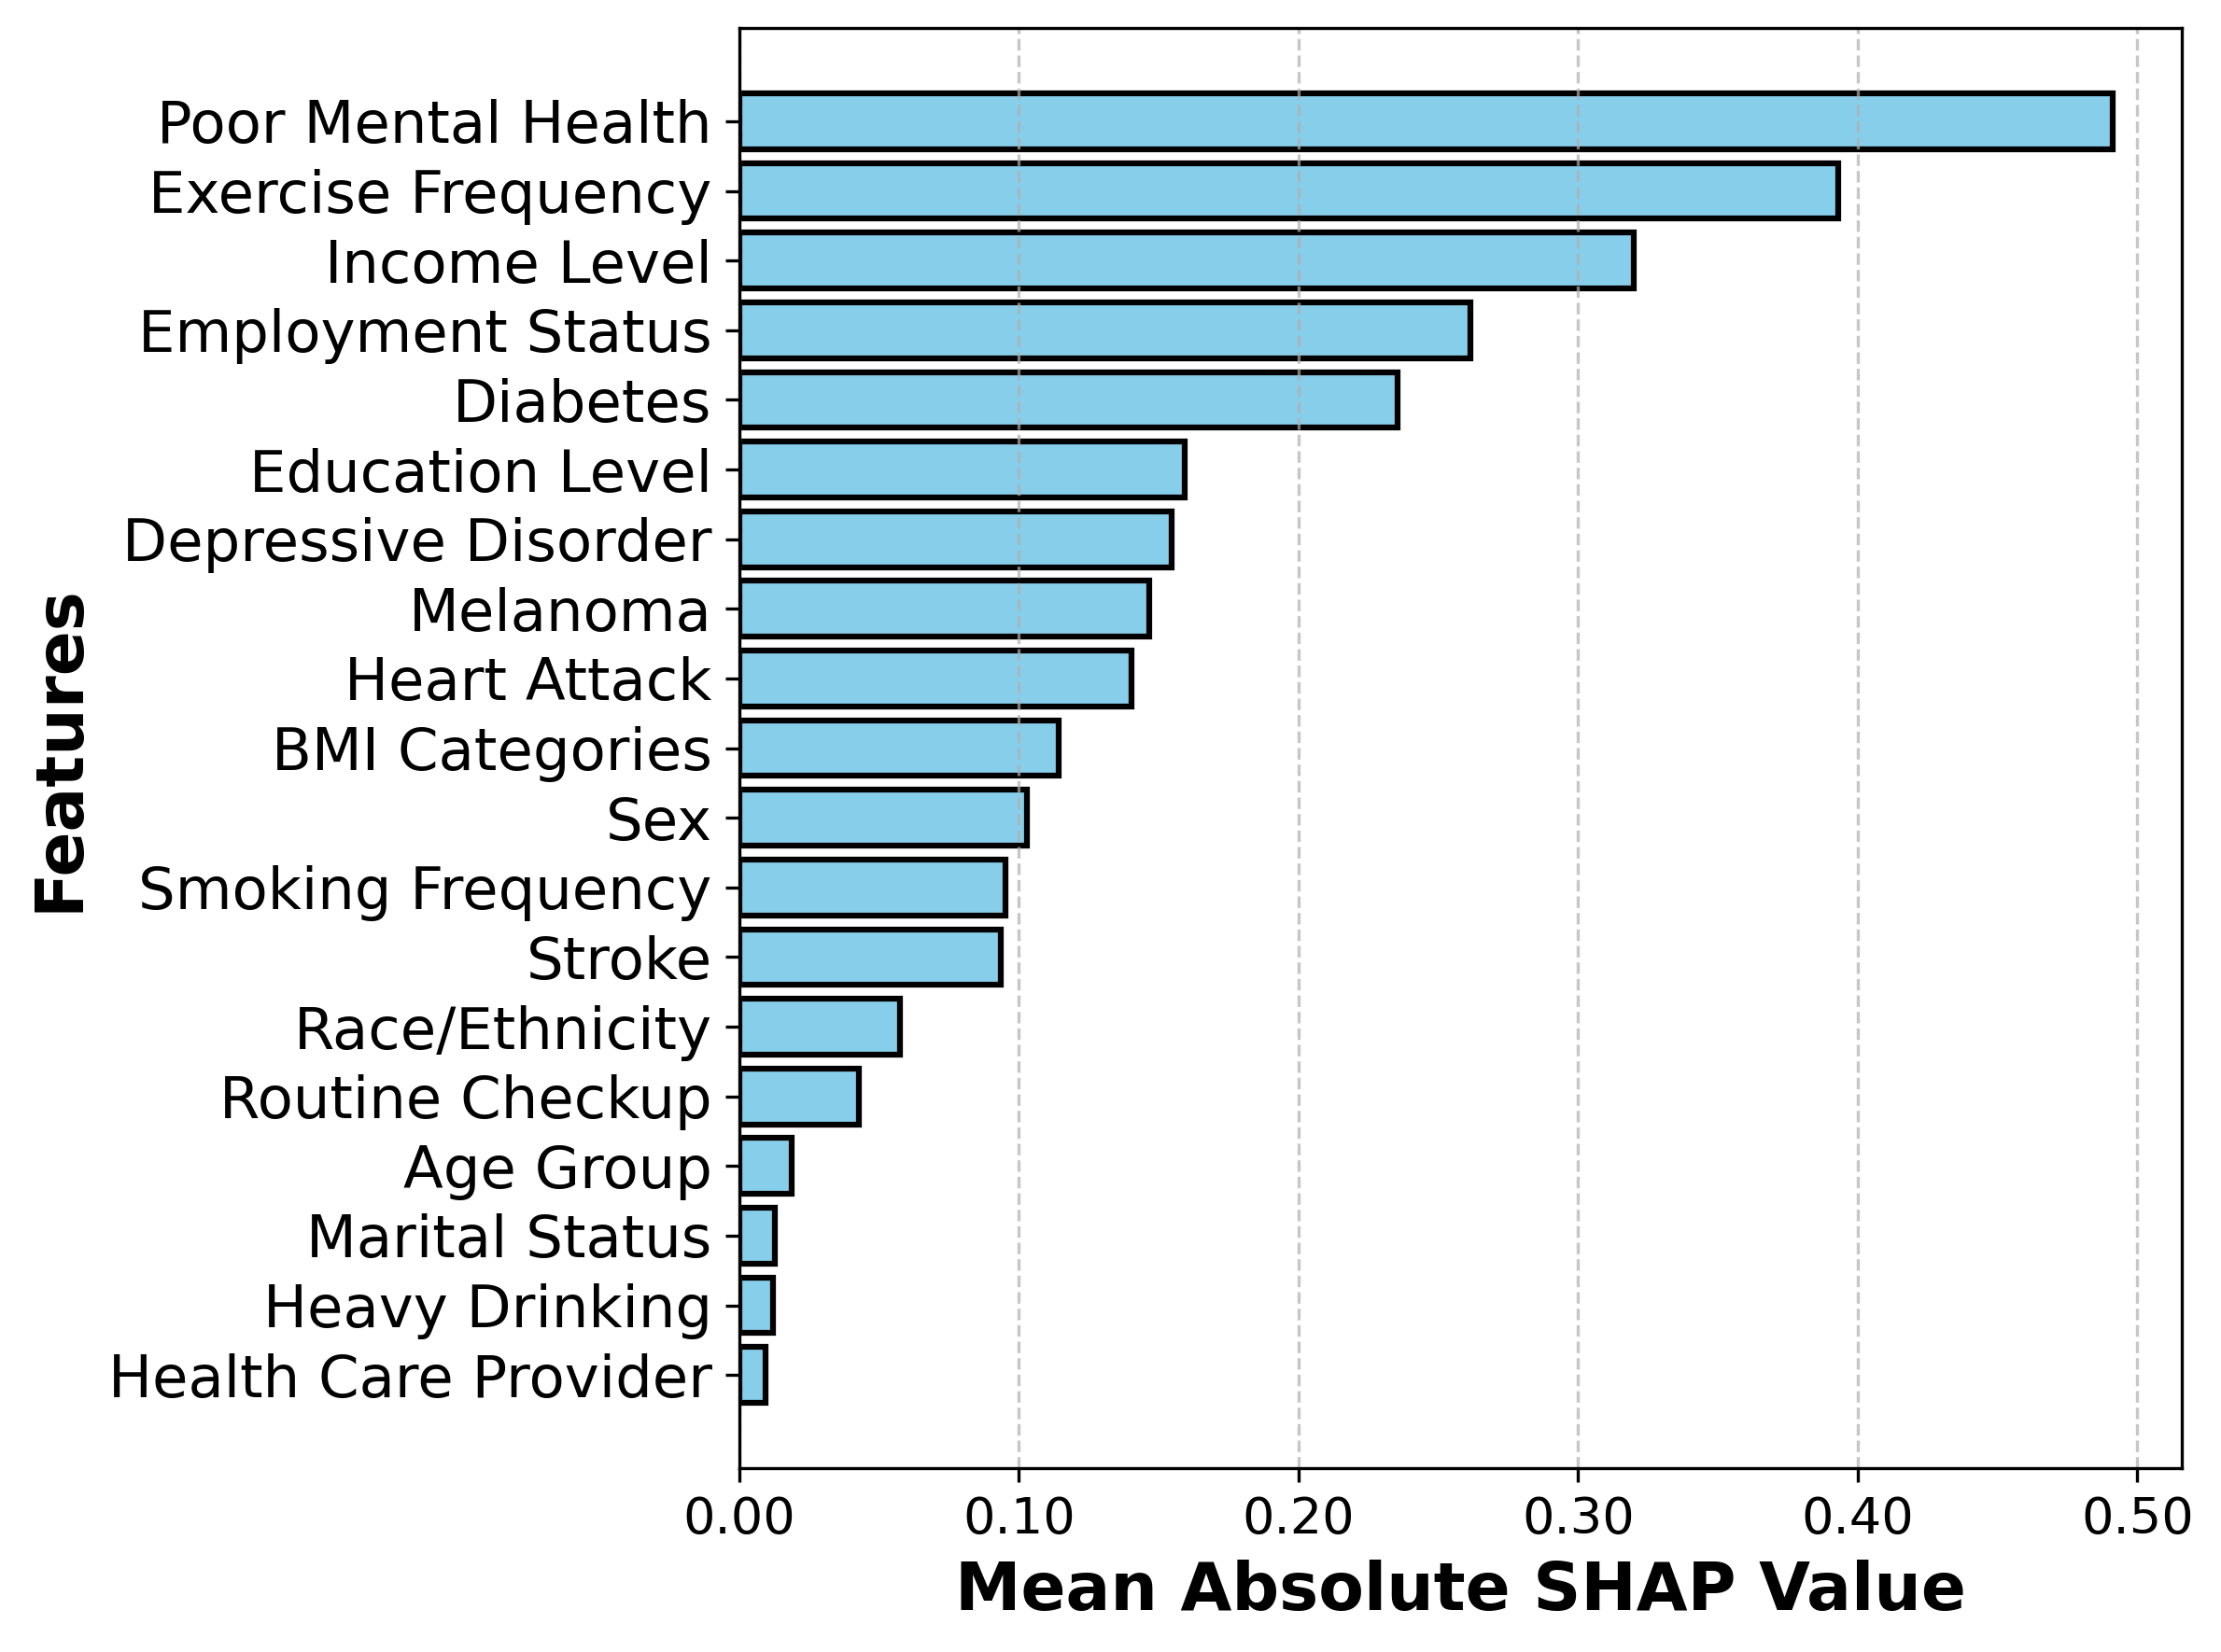

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# mean absolute SHAP values
feature_importance = np.abs(shap_values).mean(axis=0)
feature_names = np.array(X.columns)

# Sorting features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8, 6), dpi=300)
plt.barh(
    range(len(sorted_idx)),
    feature_importance[sorted_idx],
    color='skyblue',
    edgecolor='black',
    align="center",
    linewidth=1.5
)

plt.gca().invert_yaxis()  # Flip so highest is at top
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(fontsize=13)
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx], fontsize=15)
plt.xlabel('Mean Absolute SHAP Value', fontsize=17, weight='bold')
plt.ylabel('Features', fontsize=17, weight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

feature_importance = np.abs(shap_values).mean(axis=0)
feature_names = np.array(X.columns)

sorted_idx = np.argsort(feature_importance)[::-1]

shap_importance_df = pd.DataFrame({
    'Feature': feature_names[sorted_idx],
    'Mean_Abs_SHAP': feature_importance[sorted_idx]
})

shap_importance_df['Mean_Abs_SHAP'] = shap_importance_df['Mean_Abs_SHAP'].round(2)

print(shap_importance_df)

shap_importance_df.to_csv('shap_feature_importance.csv', index=False)


                 Feature  Mean_Abs_SHAP
0      Bad Mental Health           0.49
1     Exercise Frequency           0.39
2           Income Level           0.32
3      Employment Status           0.26
4               Diabetes           0.24
5        Education Level           0.16
6    Depressive Disorder           0.15
7               Melanoma           0.15
8           Heart Attack           0.14
9         BMI Categories           0.11
10                   Sex           0.10
11     Smoking Frequency           0.10
12                Stroke           0.09
13        Race/Ethnicity           0.06
14       Routine Checkup           0.04
15             Age Group           0.02
16        Marital Status           0.01
17        Heavy Drinking           0.01
18  Health Care Provider           0.01


# **Other Sampling methods and results**

In [ ]:
import pandas as pd
file_path = '/content/BRFSS2023_genhlth_cleaned.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117386 entries, 0 to 117385
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   genhlth   117386 non-null  int64
 1   sexvar    117386 non-null  int64
 2   _ageg5yr  117386 non-null  int64
 3   _imprace  117386 non-null  int64
 4   educa     117386 non-null  int64
 5   income3   117386 non-null  int64
 6   employ1   117386 non-null  int64
 7   marital   117386 non-null  int64
 8   smokday2  117386 non-null  int64
 9   _rfdrhv8  117386 non-null  int64
 10  exerany2  117386 non-null  int64
 11  diabete4  117386 non-null  int64
 12  cvdinfr4  117386 non-null  int64
 13  cvdstrk3  117386 non-null  int64
 14  chcocnc1  117386 non-null  int64
 15  addepev3  117386 non-null  int64
 16  _bmi5cat  117386 non-null  int64
 17  persdoc3  117386 non-null  int64
 18  checkup1  117386 non-null  int64
 19  menthlth  117386 non-null  int64
dtypes: int64(20)
memory usage: 17.9 MB


In [ ]:
print(data['genhlth'].value_counts())

genhlth
1    89279
0    28107
Name: count, dtype: int64


**ENN (Undersampling)**

In [ ]:

from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.model_selection import train_test_split


X2 = data.drop('genhlth', axis=1)  
y2 = data['genhlth']  


X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)


enn = EditedNearestNeighbours(n_neighbors=3)
X_train_enn, y_train_enn = enn.fit_resample(X2_train, y2_train)

# class distribution after ENN
print("Class distribution after ENN:", Counter(y_train_enn))


Class distribution after ENN: Counter({1: 46271, 0: 22485})


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr_model = LogisticRegression(solver='liblinear', random_state=42)  
lr_model.fit(X_train_enn, y_train_enn)


y_pred = lr_model.predict(X2_test)

accuracy = accuracy_score(y2_test, y_pred)
conf_matrix = confusion_matrix(y2_test, y_pred)
class_report = classification_report(y2_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Logistic Regression Accuracy: 0.7582
Confusion Matrix:
 [[ 3725  1897]
 [ 3780 14076]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57      5622
           1       0.88      0.79      0.83     17856

    accuracy                           0.76     23478
   macro avg       0.69      0.73      0.70     23478
weighted avg       0.79      0.76      0.77     23478



Logistic Regression AUC: 0.8067


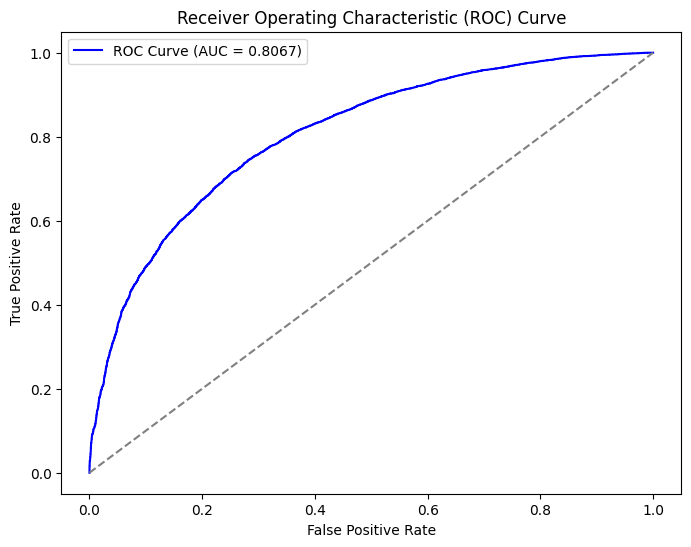

In [ ]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y_probs = lr_model.predict_proba(X2_test)[:, 1]  # Probabilities for the positive class

# AUC score
auc_score = roc_auc_score(y2_test, y_probs)
print(f"Logistic Regression AUC: {auc_score:.4f}")

#   ROC Curve
fpr, tpr, _ = roc_curve(y2_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


**SMOTE (Oversampling)**

In [ ]:
import pandas as pd
file_path = '/content/BRFSS2023_genhlth_cleaned.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117386 entries, 0 to 117385
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   genhlth   117386 non-null  int64
 1   sexvar    117386 non-null  int64
 2   _ageg5yr  117386 non-null  int64
 3   _imprace  117386 non-null  int64
 4   educa     117386 non-null  int64
 5   income3   117386 non-null  int64
 6   employ1   117386 non-null  int64
 7   marital   117386 non-null  int64
 8   smokday2  117386 non-null  int64
 9   _rfdrhv8  117386 non-null  int64
 10  exerany2  117386 non-null  int64
 11  diabete4  117386 non-null  int64
 12  cvdinfr4  117386 non-null  int64
 13  cvdstrk3  117386 non-null  int64
 14  chcocnc1  117386 non-null  int64
 15  addepev3  117386 non-null  int64
 16  _bmi5cat  117386 non-null  int64
 17  persdoc3  117386 non-null  int64
 18  checkup1  117386 non-null  int64
 19  menthlth  117386 non-null  int64
dtypes: int64(20)
memory usage: 17.9 MB


In [ ]:
print(data['genhlth'].value_counts())

genhlth
1    89279
0    28107
Name: count, dtype: int64


In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split


X2 = data.drop('genhlth', axis=1)  
y2 = data['genhlth']  # Target var


X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# SMOTE for oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X2_train, y2_train)


import pandas as pd
y_train_res = pd.Series(y_train_res)

#  class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_res))


Class distribution after SMOTE: Counter({1: 71423, 0: 71423})


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train_res, y_train_res)


y_pred = lr_model.predict(X2_test)


y_prob = lr_model.predict_proba(X2_test)[:, 1]


accuracy = accuracy_score(y2_test, y_pred)
auc = roc_auc_score(y2_test, y_prob)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.7419
AUC Score: 0.7837
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.67      0.55      5622
           1       0.88      0.77      0.82     17856

    accuracy                           0.74     23478
   macro avg       0.68      0.72      0.69     23478
weighted avg       0.78      0.74      0.76     23478



In [ ]:

from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)


y_pred_rf = rf_model.predict(X2_test)
y_prob_rf = rf_model.predict_proba(X2_test)[:, 1]


accuracy_rf = accuracy_score(y2_test, y_pred_rf)
auc_rf = roc_auc_score(y2_test, y_prob_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC Score: {auc_rf:.4f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.7401
AUC Score: 0.7581
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.56      0.51      5622
           1       0.85      0.80      0.82     17856

    accuracy                           0.74     23478
   macro avg       0.66      0.68      0.67     23478
weighted avg       0.76      0.74      0.75     23478



In [ ]:

from xgboost import XGBClassifier


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)


y_pred_xgb = xgb_model.predict(X2_test)
y_prob_xgb = xgb_model.predict_proba(X2_test)[:, 1]


accuracy_xgb = accuracy_score(y2_test, y_pred_xgb)
auc_xgb = roc_auc_score(y2_test, y_prob_xgb)

print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"AUC Score: {auc_xgb:.4f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
Accuracy: 0.7412
AUC Score: 0.7802
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.65      0.54      5622
           1       0.87      0.77      0.82     17856

    accuracy                           0.74     23478
   macro avg       0.67      0.71      0.68     23478
weighted avg       0.78      0.74      0.75     23478



In [ ]:

from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)


y_pred_dt = dt_model.predict(X2_test)
y_prob_dt = dt_model.predict_proba(X2_test)[:, 1]


accuracy_dt = accuracy_score(y2_test, y_pred_dt)
auc_dt = roc_auc_score(y2_test, y_prob_dt)

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"AUC Score: {auc_dt:.4f}")
print("Classification Report:")
print(classification_report(y2_test, y_pred_dt))


Decision Tree Model Performance:
Accuracy: 0.6806
AUC Score: 0.6198
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.50      0.43      5622
           1       0.82      0.74      0.78     17856

    accuracy                           0.68     23478
   macro avg       0.60      0.62      0.60     23478
weighted avg       0.72      0.68      0.69     23478



**SMOTEEN (Hybrid)**

In [ ]:

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from collections import Counter


X = data.drop('genhlth', axis=1)  
y = data['genhlth']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTEENN to the training set
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# class distribution after SMOTEENN
print("Class distribution after SMOTEENN:", Counter(y_train_resampled))

# verifying data shape
print(f"Resampled Training Features Shape: {X_train_resampled.shape}")
print(f"Resampled Training Labels Shape: {y_train_resampled.shape}")


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred = rf_model.predict(X_test)


print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Class distribution after SMOTEENN: Counter({0.0: 61218, 1.0: 36584})
Resampled Training Features Shape: (97802, 20)
Resampled Training Labels Shape: (97802,)
Random Forest Performance:
Accuracy: 0.7352415026833632
Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.70      0.56      5622
         1.0       0.89      0.75      0.81     17856

    accuracy                           0.74     23478
   macro avg       0.68      0.72      0.68     23478
weighted avg       0.79      0.74      0.75     23478

Confusion Matrix:
[[ 3918  1704]
 [ 4512 13344]]


In [ ]:
!python --version

Python 3.11.12
